# Problem Set #8
- MACS 30150, Dr. Evans 
- Name: Kento Yoshizawa (CNET: kyoshizawa) 
- Date: March 9, 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, precision_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

## Question 1.

In [2]:
df_jb = pd.read_csv('biden.csv')
df_jb.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [3]:
df_jb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 6 columns):
biden     1807 non-null int64
female    1807 non-null int64
age       1807 non-null int64
educ      1807 non-null int64
dem       1807 non-null int64
rep       1807 non-null int64
dtypes: int64(6)
memory usage: 84.8 KB


### (a)

In [4]:
y = df_jb['biden'].values
X = df_jb.drop('biden',axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [5]:
t_rg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
t_rg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

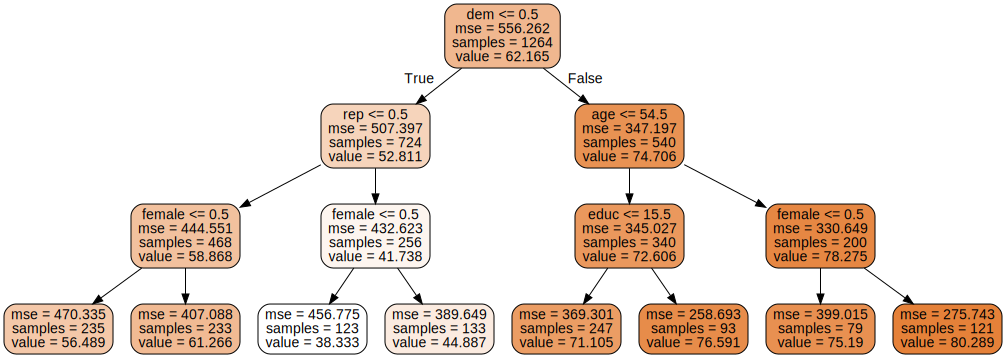

In [6]:
import graphviz
from sklearn.tree import export_graphviz

biden_viz = export_graphviz(t_rg, filled = True, rounded = True, out_file = None,
                           feature_names = df_jb.columns[1:])
graph =  graphviz.Source(biden_viz)
graph.render('biden_tree_viz')
graph

In [7]:
y_pred = t_rg.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('The test MSE: {0:.4f}'.format(MSE1))

The test MSE: 396.1937


- Male Democrats who are more than 55 years old have the most feelings of warmth toward Joe Biden.
- Male Republicans have the lowest feeling of warmth toward Biden.
- Among respondents who are neither Democrats nor Republican, female respondents are likely to have more warmth toward Biden than male. 

### (b)

In [8]:
param_dist1 = {'max_depth'        : [3, 10],
               'min_samples_split': sp_randint(2,20),
               'min_samples_leaf' : sp_randint(2,20)}

t_rg = DecisionTreeRegressor()

clf = RandomizedSearchCV(t_rg, param_dist1, n_iter = 100,
                         n_jobs = -1, cv = 5, 
                         random_state = 25, 
                         scoring = 'neg_mean_squared_error')
clf.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_dis

In [9]:
print('Optimal tuning parameter values:\n',clf.best_params_)

Optimal tuning parameter values:
 {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}


In [10]:
print('Mean cross-validated MSE of the best_estimator: {0:.4f}'.format(-clf.best_score_))

Mean cross-validated MSE of the best_estimator: 401.6904


### (c)

In [11]:
param_dist2 = {'n_estimators'     : [10, 200],
               'max_depth'        : [3, 10],
               'min_samples_split': sp_randint(2,20),
               'min_samples_leaf' : sp_randint(2,20),
               'max_features'     : sp_randint(1,5)}

rf_rg = RandomForestRegressor(random_state = 25)

clf = RandomizedSearchCV(rf_rg, param_dist2, n_iter = 100,
                         n_jobs = -1, cv = 5, 
                         random_state = 25, iid = False,
                         scoring = 'neg_mean_squared_error')
clf.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [12]:
print('Optimal tuning parameter values:\n',clf.best_params_)

Optimal tuning parameter values:
 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}


In [13]:
print('Mean cross-validated MSE of the best_estimator: {0:.4f}'.format(-clf.best_score_))

Mean cross-validated MSE of the best_estimator: 397.0967


## Question 2.

In [14]:
df_auto = pd.read_csv('Auto.csv',na_values = '?')

In [15]:
df_auto = df_auto.assign(mpg_high = df_auto.mpg.apply(lambda x: 1 if x >= np.median(df_auto.mpg) else 0))
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
mpg_high        397 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 31.1+ KB


### (a)

In [16]:
df_auto2 = pd.get_dummies(df_auto, prefix='orgn', columns = ['origin']).dropna()
X = df_auto2.drop(columns = ['mpg','mpg_high','name','orgn_3']).values
y = df_auto2['mpg_high'].values

In [17]:
X.shape

(392, 8)

In [18]:
from sklearn.model_selection import KFold
k = 4
kf = KFold(n_splits = k, random_state = 25, shuffle = True)
kf.get_n_splits(X)

lr_clf = LogisticRegression(solver = 'lbfgs', max_iter = 500)

MSE_vec_kf = np.zeros(k)
y_pred_kf = []
y_test_kf = []

k_ind = int(0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr_clf.fit(X_train, y_train)
    y_pred = lr_clf.predict(X_test)
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    y_pred_kf.append(y_pred)
    y_test_kf.append(y_test)
    k_ind += 1

In [28]:
print('k-fold estimate for test MSE: {0:.4f}'.format(MSE_vec_kf.mean()))
print('Standard error              :({0:.4f})'.format(MSE_vec_kf.std()))

y_test = np.array(y_test_kf).flatten()
y_pred = np.array(y_pred_kf).flatten()
for i,ps in enumerate(1 - precision_score(y_test, y_pred, average = None)):
    print('Error rate for mpg_high = {0}: {1:.3f}'.format(i,ps))

k-fold estimate for test MSE: 0.0969
Standard error              :(0.0275)
Error rate for mpg_high = 0: 0.080
Error rate for mpg_high = 1: 0.113


### (b)

In [29]:
param_dist3 = {'n_estimators'     : [10, 200],
               'max_depth'        : [3, 8],
               'min_samples_split': sp_randint(2,20),
               'min_samples_leaf' : sp_randint(2,20),
               'max_features'     : sp_randint(1,8)}

rf_rg = RandomForestRegressor(random_state = 25)

clf = RandomizedSearchCV(rf_rg, param_dist3, n_iter = 100,
                         n_jobs = -1, cv = 4, 
                         random_state = 25,
                         scoring = 'neg_mean_squared_error')
%time clf.fit(X, y)

CPU times: user 450 ms, sys: 40.7 ms, total: 490 ms
Wall time: 12.4 s


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [30]:
print('Optimal tuning parameter values:\n',clf.best_params_)

Optimal tuning parameter values:
 {'max_depth': 8, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 10}


In [31]:
print('Mean cross-validated MSE of the best_estimator: {0:.4f}'.format(-clf.best_score_))

Mean cross-validated MSE of the best_estimator: 0.0932


### (c)

In [23]:
param_dist4 = {'C'        : sp_uniform(loc = 0.2,scale = 4.0),
               'gamma'    : ['scale','auto'],
               'shrinking': [True,False]}

svm = svm.SVC(kernel='rbf')

clf = RandomizedSearchCV(svm, param_dist4, n_iter = 100,
                         n_jobs = -1, cv = 4, 
                         random_state = 25, iid = False,
                         scoring = 'neg_mean_squared_error')
%time clf.fit(X, y)

CPU times: user 254 ms, sys: 7.22 ms, total: 261 ms
Wall time: 644 ms


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid=False, n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11b2bb128>,
                                        'gamma': ['scale', 'auto'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=25, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [24]:
print('Optimal tuning parameter values:\n',clf.best_params_)

Optimal tuning parameter values:
 {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}


In [25]:
print('Mean cross-validated MSE of the best_estimator: {0:.4f}'.format(-clf.best_score_))

Mean cross-validated MSE of the best_estimator: 0.1199


### (d)
Since `RandomForestClassifier` has the lowest MSE for this classification the model is the best, although it took 12 seconds to finish the search for best hyperparameters.